In [ ]:
# See 231009_assign_scores_toA_and_visualize-neg

In [14]:
import sys
sys.path.insert(0, '/private/groups/brookslab/gabai/tools/seqUtils/src/')
import time
import numpy as np
from seqUtil import *
from bamUtil import *
from nanoUtil import *
from nntUtil import *
from modPredict import *
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
chromPlot = 'chrII'
pStart = 429000
pEnd = 435000

In [6]:
with open('/private/groups/brookslab/gabai/projects/Add-seq/data/ref/sacCer3.gtf') as gtfFh:
    for line in gtfFh:
        if '##' in line:
            pass
        else:
            line = line.split('\t')
            chrom = str(line[0])
            start = int(line[3])
            end = int(line[4])
            feature = line[2]
            if chrom != chromPlot:
                pass
            else:
                if feature in ['exon', 'CDS']:
                    geneID = line[8].split(';')[0].split('gene_id "')[1].split('"')[0]
                    print(geneID)
                    # New transcipts
                    if transID != trans:
                    # Store the previous transcript
                    if trans in gtfReads:
                        minstart = min(gtfReads[trans]['starts'])
                        maxend = max(gtfReads[trans]['ends'])
                        if maxend <= startPlot:
                             del gtfReads[trans]
                        elif minstart >= endPlot:
                             del gtfReads[trans]
                        else:
                            gtfReads[trans]['start'] = minstart
                            gtfReads[trans]['end'] = maxend
                            # print(gtfReads[trans]['start'])
                            count +=1
                            # print(count)
                    trans = transID
                    gtfReads[trans] = {'starts': [start],
                                        'ends': [end],
                                        }
                    gtfReads[trans][feature] = ([start], [end])
                    else:
                    gtfReads[trans]['starts'].append(start)
                    gtfReads[trans]['ends'].append(end)
                    if feature in gtfReads[trans]:
                        gtfReads[trans][feature][0].append(start)
                        gtfReads[trans][feature][1].append(end)
                    else:
                        gtfReads[trans][feature] = ([start], [end])                   

YBL047C


In [26]:
chrom_read1 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/eventalign/PHO5_chrom_0403112a-b3f1-410e-8365-7d3b7c27d625_chrII:429000-435000modelScores.tsv'
chrom_read2 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/eventalign/PHO5_chrom_2cea5b76-0076-44dc-8651-15b165506dca_chrII:429000-435000modelScores.tsv'

In [25]:
probs = []
with open(chrom_read1, 'r') as scoreFh:
    for line in scoreFh:
        line = line.strip().split('\t')
        prob = float(line[1])
        probs.append(prob)
print(len(probs))
return(probs)
x = np.arange(429000,  435000, 1, dtype = int)
plt.plot(x,y, color=color, label = label)

NameError: name 'model_score' is not defined

In [24]:
scores = plotScore(chrom_read1, color = 'g', label = 'read1')
positions = list(np.arange(429000, 435000, 1, dtype = int))

6000


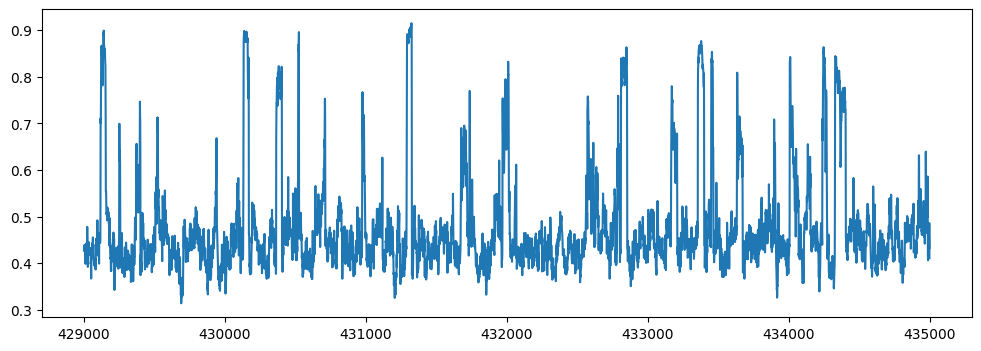

In [19]:
plt.figure(figsize=(12,4))
plot = plt.plot(positions, scores)